# Density contours in DM halos

Implementation of the (Jing & Suto 2002) alogirthm. 

## To do:

1. Finish the proper Kernel implementation.
2. Make pretty plots

In [18]:
%pylab inline
from sklearn.neighbors import KDTree
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl

Populating the interactive namespace from numpy and matplotlib


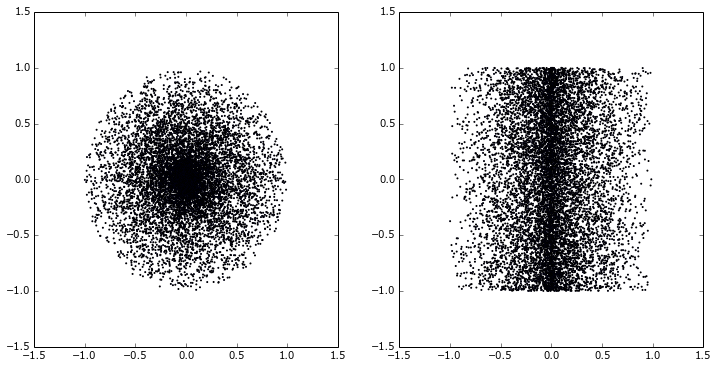

In [7]:
figure(figsize=(12, 6))
n_particles = 10000
phi = random.rand(n_particles) * 2*pi
theta = random.rand(n_particles) * 2 - 1
R = random.rand(n_particles)
X = R * sin(phi) * sin(arccos(theta))
Y = R * cos(phi) * sin(arccos(theta))
Z = random.rand(n_particles) * 2 - 1
plt.subplot(1, 2, 1)
scatter(X, Y, s=1)
plt.subplot(1, 2, 2)
scatter(X, Z, s=1)
M = random.rand(n_particles) * 10 

## 1. Find the 32 nearest neighboors to each particle

In [8]:
def nearest_neighboors(x, y, z, index):
    D = np.array([x, y, z])
    D = D.T
    tree = KDTree(D, leaf_size=2500)  
    dist, ind = tree.query(D[index], k=33)   
    return dist, ind

In [9]:
distances, ids = nearest_neighboors(X, Y, Z, 1)

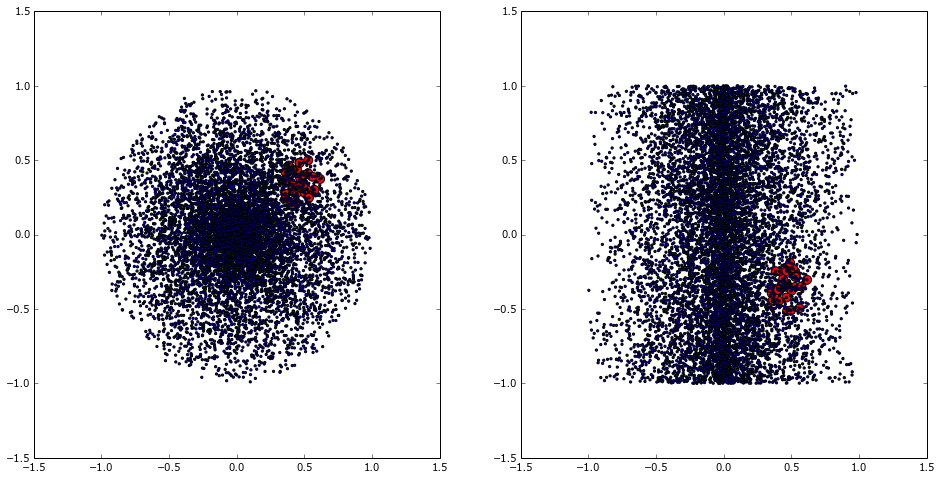

In [10]:
figure(figsize=(16, 8))
subplot(1, 2, 1)
for i in range(len(ids)):
    scatter(X[ids[i]], Y[ids[i]], c='r', s=80)
    scatter(X[1], Y[1])
    scatter(X, Y, s=5)
subplot(1, 2, 2)
for i in range(len(ids)):
    scatter(X[ids[i]], Z[ids[i]], c='r', s=80)
    scatter(X[1], Z[1])
    scatter(X, Z, s=5)
    #ylim(0.62, 0.74)
    #xlim(-0.7, -0.58)

In [11]:
def particles(IDs, X, Y, Z, M):
    Xn = np.zeros(len(IDs[0]))
    Yn = np.zeros(len(IDs[0]))
    Zn = np.zeros(len(IDs[0]))
    Mn = np.zeros(len(IDs[0]))
    for i in range(len(IDs[0])):
        Xn[i] = X[IDs[0][i]]
        Yn[i] = Y[IDs[0][i]]
        Zn[i] = Z[IDs[0][i]]
        Mn[i] = M[ids[0][i]]
    return Xn, Yn, Zn, Mn

In [12]:
def kernel(Distances, mass):
    Distances = Distances[0]
    h = max(Distances)/ 2.0
    high_dens = where(Distances <= h)[0]
    low_dens = where(Distances > h)[0]
    m_high = mass[high_dens]
    d_high = Distances[high_dens]
    rho_h = np.zeros(len(m_high))
    for j in range(len(m_high)):
        rho_h[j] = m_high[j] * (1 - 3.0/2.0*(d_high[j]/h)**2 + 3.0/4.0 * (d_high[j]/h)**3.0)\
        /(pi * h**3)
    rho_1 = sum(rho_h)
    return rho_1

In [13]:
rho = np.zeros(n_particles)
for i in range(n_particles):
    distances, ids = nearest_neighboors(X, Y, Z, i)
    X_n, Y_n, Z_n, M_n = particles(ids, X, Y, Z, M)
    rho[i] = kernel(distances, M_n)

(-1.5, 1.5)

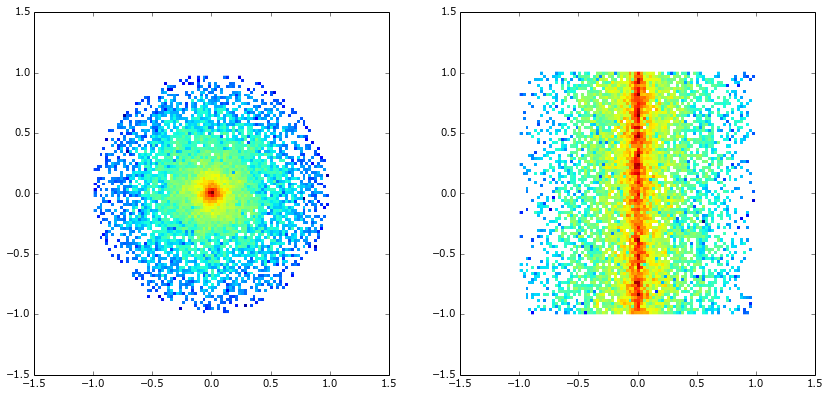

In [29]:
figure(figsize=(14, 6.5))
subplot(1, 2, 1)
h = hist2d(X, Y, weights=rho, bins=80, norm=mpl.colors.LogNorm())
xlim(-1.5, 1.5)
ylim(-1.5, 1.5)

subplot(1, 2, 2)
h = hist2d(X, Z, weights=rho, bins=80, norm=mpl.colors.LogNorm())
xlim(-1.5, 1.5)
ylim(-1.5, 1.5)